# Supervised Learning

### Project Overview
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

Since the data holds label we will use supervised learning.
 
The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#)

### The goal 
The classification goal is to predict if the client will subscribe (yes/no) a term deposit ( output).

In [266]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.base import clone


import warnings
warnings.filterwarnings('ignore')


from sklearn.tree import DecisionTreeClassifier #Initialize the  Decision Tree Classifier model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as pl
import seaborn as sns
%matplotlib inline

### Exploring the Data

After run the code cell libraries, we will explore the data in bank marketing where the last column of the data set (the exit) is the result from whether the customer deposited in the bank or not.

In [267]:
#Read the data
data = pd.read_csv('bank-additional-full.csv')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,output
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,no


### Featureset Exploration

1 - age (numeric).

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - output: Predictor class: yes, no

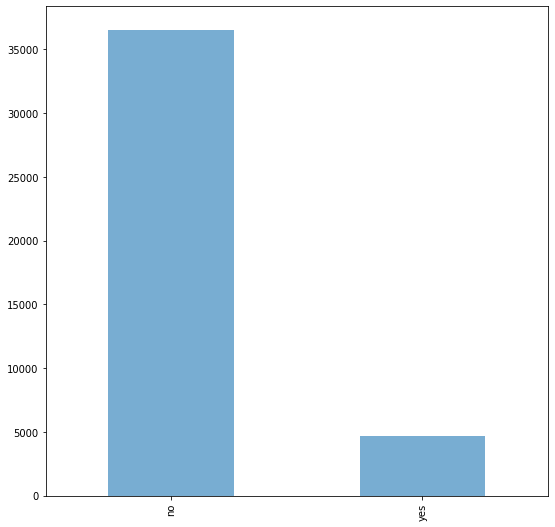

In [303]:
data['output'].value_counts().plot(kind='bar',alpha=0.6,figsize=(9,9))
plt.show()

In [268]:
#Data describe
data.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [269]:
#shape of data set
data.shape

(41188, 15)

In [270]:
# Number of Rows
n_records = len(data)
print("Total number of records: {}".format(n_records))

Total number of records: 41188


In [271]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 15 columns):
age            41188 non-null int64
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
duration       41188 non-null int64
campaign       41188 non-null int64
pdays          41188 non-null int64
previous       41188 non-null int64
output         41188 non-null object
dtypes: int64(5), object(10)
memory usage: 4.7+ MB


In [272]:
#Data Columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'output'],
      dtype='object')

### Clean the data
Ensure that the data holds missing values and replace them, but the data provided is clean

In [273]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
output         0
dtype: int64

## Preparing the Data
Before we enter data into machine learning algorithms, we must clean, coordinate, and restructure this is known as (preprocessing). Fortunately, the data provided is clean.
However, there are some characteristics about some of the features that should be controlled that will help increase the efficiency of prediction

In [274]:
# define variables(outcomes, features)
outcome = data['output']
features = data.drop(['output'], axis = 1)

# Show the new dataset without output column
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0


In [275]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
age            41188 non-null int64
job            41188 non-null object
marital        41188 non-null object
education      41188 non-null object
default        41188 non-null object
housing        41188 non-null object
loan           41188 non-null object
contact        41188 non-null object
month          41188 non-null object
day_of_week    41188 non-null object
duration       41188 non-null int64
campaign       41188 non-null int64
pdays          41188 non-null int64
previous       41188 non-null int64
dtypes: int64(5), object(9)
memory usage: 4.4+ MB


In [276]:
features.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0


# Normalizing Numerical Features
We will use normalization because the data distribution is not the bell curve so for that machine learning, we have to do normalization when the features have different ranges.

Run the code cell below to normalize each numerical feature. We will use sklearn.preprocessing.MinMaxScaler for this.



In [277]:
#transformation: Perform feature scaling on the data
# first: define the scaling object using MinMaxScaler()
scaler = MinMaxScaler()


# second: apply the scaler to the numerical columns on the data:
numerical = ['age', 'duration', 'campaign', 'previous']
features[numerical] = scaler.fit_transform(features[numerical])

#Display
display(features.head(n = 5))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous
0,0.481481,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.053070,0.0,999,0.0
1,0.493827,services,married,high.school,unknown,no,no,telephone,may,mon,0.030297,0.0,999,0.0
2,0.246914,services,married,high.school,no,yes,no,telephone,may,mon,0.045954,0.0,999,0.0
3,0.283951,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.030704,0.0,999,0.0
4,0.481481,services,married,high.school,no,no,yes,telephone,may,mon,0.062424,0.0,999,0.0


### Data processing

There are many advantages to each non-numeric record, the algorithm expects the input to be numeric and this requires the conversion of non-numeric features, using the one-hot encoding scheme and creates one hot variable "dummy" encoding for each possible category of each non-numeric feature

In [278]:
# One-hot encode the 'features' data using pandas.get_dummies()
features_final = pd.get_dummies(features)

#Encode the outcome column data to numerical values
result = outcome.apply(lambda x: 0 if x == 'no' else 1 )

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))


55 total features after one-hot encoding.


In [279]:
pd.set_option('display.max_columns', None)
features_final.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.481481,0.053070,0.0,999,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0.493827,0.030297,0.0,999,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,0.246914,0.045954,0.0,999,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0.283951,0.030704,0.0,999,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,0.481481,0.062424,0.0,999,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


### Split data into testing and training
After the variables have been converted to numric features and all the numric features have been settled, then we will divide the data into training and testing groups. 80% of the data will be used for training and 20% for testing.

In [280]:
# Split the 'features' and 'result' to training and testing 
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    result, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results
print("Training {} samples.".format(X_train.shape[0]))
print("Testing {} samples.".format(X_test.shape[0]))

Training 32950 samples.
Testing 8238 samples.


## Supervised Learning Model

Decision Trees Was chosen for several reasons, including:
- Easy to use and excellent to grow on
- Excellent graphic design
- Easy to understand 
- Prone to overfitting specialty when the data has lots of features

In [281]:
# Define the classifier model as DecisionTree
model = DecisionTreeClassifier()


#fit the model to the data
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [282]:
# Making predictions on scaling data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.8807963097839281


### Improving the model
Ok, high training accuracy and a lower testing accuracy. We may be overfitting a bit.

Train a new model, and try to specify some parameters in order to improve the testing accuracy, such as:

- max_depth The maximum number of levels in the tree.
- min_samples_leaf The minimum number of samples allowed in a leaf.
- min_samples_split The minimum number of samples required to split an internal node.

### Improving Results
We will optimize the model's search network across the entire training set (X_train and y_train) by setting at least one parameter to optimization.

### Model Tuning
Adjust the selected model. We will use GridSearchCV with at least one important parameter set with at least three different values. We will need to use the entire training kit for this.



In [299]:
#grid search
#import gridsearch
from sklearn.model_selection import GridSearchCV

#set the classifier model
clf = DecisionTreeClassifier(random_state=40)
#set the parameters:
parameters = {'max_depth': [5, 6, 7,8, 9, 10], 'min_samples_leaf': [2, 3, 4, 5, 6], 'min_samples_split': [5, 6, 7, 8, 9, 10]}
#define the score method using make_scorer()
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
scorer = make_scorer(accuracy_score)

#define gridsearchcv function with cv=3
grid_obj = GridSearchCV(clf, parameters, scoring=scorer, cv=3)
#fit/ train the function/ object
grid_fit = grid_obj.fit(X_train, y_train)
#get the best estimtor model
best_clf = grid_fit.best_estimator_

# Make predictions using the new model.
y_train_pred = best_clf.predict(X_train)
y_test_pred = best_clf.predict(X_test)

In [284]:
# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 0.91298937784522
The test accuracy is 0.9139354212187424


### Feature Importance
We'll choose a learning algorithm under the supervision of scikit for learning that has the feature_importance_ attribute available to it.
This attribute is a function that classifies the importance of each feature when making forecasts based on the chosen algorithm.

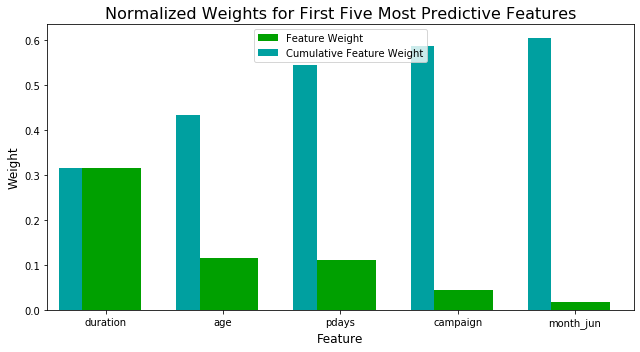

In [302]:
#Import a supervised learning model that has 'feature_importances_'
clf = DecisionTreeClassifier(random_state = 42)
#Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train,y_train)

#Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_
vs.feature_plot(importances, X_train, y_train)

###  Extracting Feature Importance

Through the diagram above, we find that the month of JUN is one of the most influencing factors affecting the client in his decision making.
And also the number of contacts performed during this campaign and for this client.

### Feature Selection
From the above visualization, we see that the five most important features contribute more than half the importance of all the features in the data. This indicates that we can try to reduce the feature space and simplify the information required to learn the model. The blade cell below will use the same optimal model you found previously, and train it in the same training kit with only the top five important features.



In [289]:
# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)
best_predictions = best_clf.predict(X_test)
# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))

print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))


Final Model trained on full data
------
Accuracy on testing data: 0.9139

Final Model trained on reduced data
------
Accuracy on testing data: 0.9101


### Effects of Feature Selection
After we reduced the data, the accuracy changed from 0.9139 to 0.9101 .But it is not a big difference because we have reduced the data